Missing values in the dataset:
category                0
headline                0
links                   0
short_description       0
keywords             2668
dtype: int64


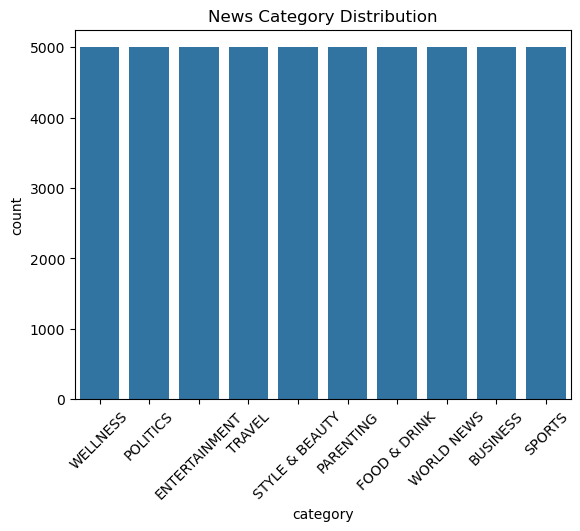

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ajayb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ajayb/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\ajayb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Model: LogisticRegression
Accuracy: 0.659
Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.63      0.68      0.65       955
 ENTERTAINMENT       0.54      0.55      0.55       985
  FOOD & DRINK       0.70      0.71      0.71      1021
     PARENTING       0.66      0.64      0.65      1030
      POLITICS       0.65      0.59      0.61      1034
        SPORTS       0.68      0.71      0.70       995
STYLE & BEAUTY       0.74      0.70      0.72       986
        TRAVEL       0.71      0.66      0.68      1008
      WELLNESS       0.63      0.67      0.65      1009
    WORLD NEWS       0.66      0.67      0.67       977

      accuracy                           0.66     10000
     macro avg       0.66      0.66      0.66     10000
  weighted avg       0.66      0.66      0.66     10000



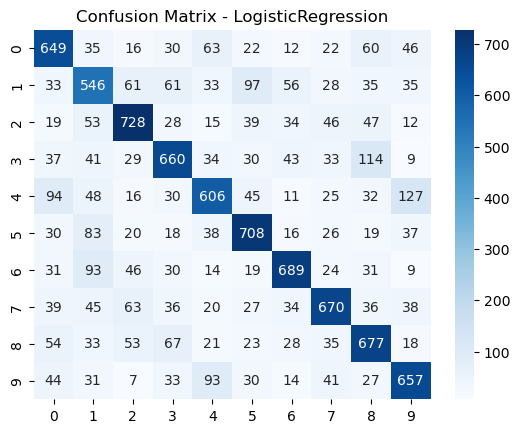


Model: MultinomialNB
Accuracy: 0.6405
Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.56      0.65      0.60       955
 ENTERTAINMENT       0.61      0.51      0.55       985
  FOOD & DRINK       0.69      0.72      0.71      1021
     PARENTING       0.52      0.63      0.57      1030
      POLITICS       0.67      0.58      0.62      1034
        SPORTS       0.72      0.65      0.69       995
STYLE & BEAUTY       0.70      0.69      0.70       986
        TRAVEL       0.68      0.65      0.67      1008
      WELLNESS       0.60      0.65      0.62      1009
    WORLD NEWS       0.68      0.69      0.68       977

      accuracy                           0.64     10000
     macro avg       0.65      0.64      0.64     10000
  weighted avg       0.65      0.64      0.64     10000



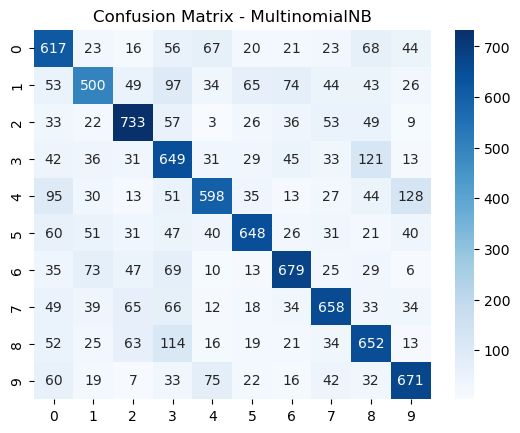


Model: SVC
Accuracy: 0.6488
Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.60      0.69      0.64       955
 ENTERTAINMENT       0.48      0.58      0.52       985
  FOOD & DRINK       0.69      0.72      0.71      1021
     PARENTING       0.66      0.63      0.65      1030
      POLITICS       0.62      0.57      0.59      1034
        SPORTS       0.70      0.71      0.70       995
STYLE & BEAUTY       0.75      0.68      0.71       986
        TRAVEL       0.71      0.63      0.67      1008
      WELLNESS       0.64      0.64      0.64      1009
    WORLD NEWS       0.68      0.64      0.66       977

      accuracy                           0.65     10000
     macro avg       0.65      0.65      0.65     10000
  weighted avg       0.65      0.65      0.65     10000



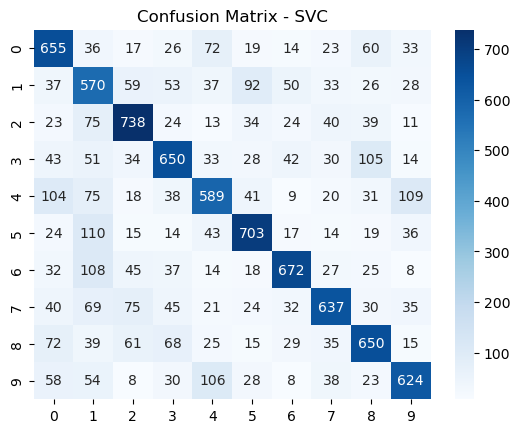


Model: RandomForestClassifier
Accuracy: 0.6271
Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.75      0.74      0.75       955
 ENTERTAINMENT       0.47      0.50      0.49       985
  FOOD & DRINK       0.59      0.66      0.62      1021
     PARENTING       0.70      0.63      0.66      1030
      POLITICS       0.62      0.52      0.56      1034
        SPORTS       0.68      0.85      0.76       995
STYLE & BEAUTY       0.70      0.62      0.65       986
        TRAVEL       0.66      0.56      0.61      1008
      WELLNESS       0.55      0.61      0.58      1009
    WORLD NEWS       0.58      0.59      0.59       977

      accuracy                           0.63     10000
     macro avg       0.63      0.63      0.63     10000
  weighted avg       0.63      0.63      0.63     10000



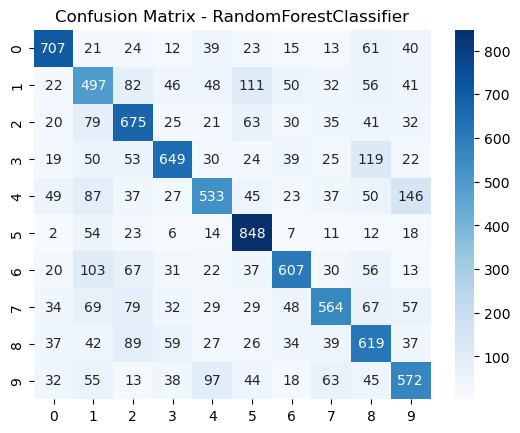

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data_news_df = pd.read_csv("C:/Users/ajayb/Downloads/data_news - data_news.csv")

# Check for missing values
print("Missing values in the dataset:")
print(data_news_df.isnull().sum())

# Class distribution
sns.countplot(x='category', data=data_news_df)
plt.title("News Category Distribution")
plt.xticks(rotation=45)
plt.show()

# Text Preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r"<br\s*/?>", " ", text)
    # Keep only letters
    text = re.sub(r"[^a-zA-Z]", " ", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Lemmatize and remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply preprocessing to the 'short_description' column
data_news_df["cleaned_text"] = data_news_df["short_description"].apply(preprocess_text)

# Train-test split
X_train_news, X_test_news, y_train_news, y_test_news = train_test_split(
    data_news_df["cleaned_text"], data_news_df["category"], test_size=0.2, random_state=42)

# Feature Extraction using TF-IDF
vectorizer_news = TfidfVectorizer(max_features=5000)
X_train_tfidf_news = vectorizer_news.fit_transform(X_train_news)
X_test_tfidf_news = vectorizer_news.transform(X_test_news)

# Model Training & Evaluation
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {model.__class__.__name__}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    # Confusion Matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()

# Train multiple models for News Dataset
models = [
    LogisticRegression(),
    MultinomialNB(),
    SVC(kernel='linear'),
    RandomForestClassifier(n_estimators=100)
]

for model in models:
    train_and_evaluate_model(model, X_train_tfidf_news, y_train_news, X_test_tfidf_news, y_test_news)